In [1]:
import subprocess
from array import array

In [2]:
import ROOT

Welcome to JupyROOT 6.29/01


In [3]:
!ls

plots.ipynb


In [4]:
N = 200000
b = 128 

In [7]:
%%capture output
!./InvariantMassSYCL $N $b $0

In [8]:
output.show()

N: 200000, local_size: 128, embed_computation: 0
[hipSYCL Warning] OpenCL device NVIDIA GeForce RTX 3060 does not have a valid USM provider. Memory allocations are not possible on that device.
sycl time 0.10979
sycl time 0.00602198
sycl time 0.00342607


In [3]:
sizes = array('d',[100000,1000000,5000000,10000000, 50000000,100000000]) #10,100,1000,10000,100000,
n = len(sizes)

In [10]:
buildoneapi = '/home/mdessole/Projects/ROOT/genvectorx/build_oneapi/'

In [11]:
buildopensycl = '/home/mdessole/Projects/ROOT/genvectorx/build_opensycl/'

In [16]:
!ls /home/mdessole/Projects/ROOT/genvectorx/build_opensycl/testx

CMakeFiles  CoordsOpenSYCL  RVec  RVecSYCL  cmake_install.cmake


In [19]:
!ls /home/mdessole/Projects/ROOT/genvectorx/build_oneapi/testx

CMakeFiles  CoordsOneAPI  RVec	RVecSYCL  cmake_install.cmake


In [5]:
!echo $LD_LIBRARY_PATH

/opt/intel/oneapi/tbb/2021.10.0/env/../lib/intel64/gcc4.8:/opt/intel/oneapi/debugger/2023.2.0/gdb/intel64/lib:/opt/intel/oneapi/debugger/2023.2.0/libipt/intel64/lib:/opt/intel/oneapi/debugger/2023.2.0/dep/lib:/opt/intel/oneapi/compiler/2023.2.1/linux/lib:/opt/intel/oneapi/compiler/2023.2.1/linux/lib/x64:/opt/intel/oneapi/compiler/2023.2.1/linux/lib/oclfpga/host/linux64/lib:/opt/intel/oneapi/compiler/2023.2.1/linux/compiler/lib/intel64_lin:/home/mdessole/Projects/sycl-blas/sycl-blas_build/benchmark/googlebench-build/src:/opt/OpenBLAS/lib:/home/mdessole/Projects/sycl-blas/sycl-blas_build/lib:/home/mdessole/Projects/sycl-blas/sycl-blas/lib:/home/mdessole/Projects/OpenSYCL/OpenSYCL_install/lib:/usr/local/cuda-11.8/lib64:/home/mdessole/Projects/ROOT/root/lib


In [8]:
timecpu = array( 'd' )
for N in sizes:
    result = subprocess.run([buildoneapi+'testx/RVec', str(int(N)) ], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timecpu.append(float(result[i+5:-3]))

In [9]:
timecpu

array('d', [0.019304, 0.194226, 0.973859, 1.93925, 9.62901, 19.3177])

In [16]:
timeoneapi = array( 'd' )
for N in sizes:
    result = subprocess.run([builddir+'testx/RVecSYCL', str(int(N))], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timeoneapi.append(float(result[i+5:-3]))

In [7]:
timeoneapi

array('d', [0.005807, 0.044061, 0.210058, 0.418345, 2.0, 4.47335])

In [15]:
buildopensycl+'testx/RVecSYCL'

'/home/mdessole/Projects/ROOT/genvectorx/build_opensycl/testx/RVecSYCL'

In [17]:
timeopensycl = array( 'd' )
for N in sizes:
    result = subprocess.run([buildopensycl+'testx/RVecSYCL', str(int(N))], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timeopensycl.append(float(result[i+5:-3]))

In [18]:
timeopensycl

array('d', [0.005224, 0.042251, 0.192832, 0.388221, 1.83859, 3.7055])

In [19]:
speedupopensycl = array('d', [timecpu[i]/timeopensycl[i] for i in range(n)])
speeduponeapi   = array('d', [timecpu[i]/timeoneapi[i] for i in range(n)])

In [12]:
val = list(sizes)
sizes_gb = [v*8*4/1e9 for v in val]
sizes_gb = array('d', sizes_gb)
sizes_gb

array('d', [0.0032, 0.032, 0.16, 0.32, 1.6, 3.2])

In [21]:
p = ROOT.TGraph(len(sizes), sizes, speedupopensycl)
g = ROOT.TGraph(len(sizes), sizes, speeduponeapi)


c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
p.SetMarkerStyle(5)
p.SetLineColor(ROOT.kRed)


p.SetTitle("")
p.GetXaxis().SetTitle( 'Input size (# doubles)' )
p.GetYaxis().SetTitle( 'Speedup x' )

p.GetYaxis().SetRangeUser(0,6)

leg = ROOT.TLegend(0.7, 0.75, 0.90, 0.87)
leg.AddEntry(p,"OpenSYCL","L")
leg.AddEntry(g,"OneAPI","L")
#leg.AddEntry(q,"SYCL","l")


c4.SetLogx();

p.Draw()
g.Draw('LP')
#q.Draw('LP')
leg.Draw()
c4.Draw()

c4.SaveAs("speedup.png")

Info in <TCanvas::Print>: png file speedup.png has been created


In [71]:
b = 256

timesycl = array( 'd' )
for N in sizes:
    result = subprocess.run(['./InvariantMassSYCL', str(int(N)), str(int(b)), str(embed_computation)], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timesycl.append(float(result[i+5:-1]))

In [72]:
b = 256

timesyclplain = array( 'd' )
for N in sizes:
    result = subprocess.run(['./InvariantMassSYCL_plain', str(int(N)), str(int(b)), str(embed_computation)], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timesyclplain.append(float(result[i+5:-1]))

In [73]:
timecuda = array( 'd' )
for N in sizes:
    result = subprocess.run(['./InvariantMassCUDA256', str(int(N))], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timecuda.append(float(result[i+5:-1]))

In [74]:
speedupsycl256 = array('d', [timecpu[i]/timesycl[i] for i in range(n)])
speedupsyclplain256 = array('d', [timecpu[i]/timesyclplain[i] for i in range(n)])
speedupcuda256 = array('d', [timecpu[i]/timecuda[i] for i in range(n)])

Info in <TCanvas::Print>: png file block256_embed0.png has been created


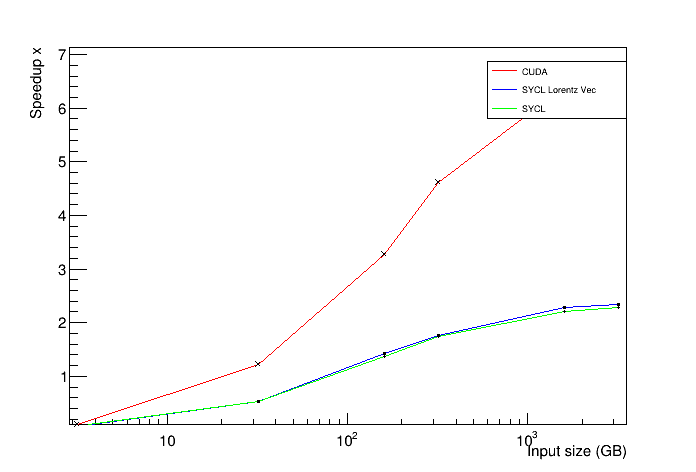

In [75]:
g = ROOT.TGraph(len(sizes), sizes_gb, speedupsycl256)
p = ROOT.TGraph(len(sizes), sizes_gb, speedupcuda256)
q = ROOT.TGraph(len(sizes), sizes_gb, speedupsyclplain256)

#g.AddPoint(sizes, timecpu)

c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
p.SetMarkerStyle(5)
p.SetLineColor(ROOT.kRed)
q.SetMarkerStyle(6)
q.SetLineColor(ROOT.kGreen)



p.SetTitle("")
p.GetXaxis().SetTitle( 'Input size (GB)' )
p.GetYaxis().SetTitle( 'Speedup x' )

p.GetYaxis().SetRangeUser(0,6)

leg = ROOT.TLegend(0.7, 0.75, 0.90, 0.87)
leg.AddEntry(p,"CUDA","L")
leg.AddEntry(g,"SYCL Lorentz Vec","L")
leg.AddEntry(q,"SYCL","l")


c4.SetLogx();

p.Draw()
g.Draw('LP')
q.Draw('LP')
leg.Draw()
c4.Draw()

c4.SaveAs("block"+str(b)+"_embed"+str(embed_computation)+".png")

In [82]:
embed_computation = 1

In [83]:
b = 512

timesycl = array( 'd' )
for N in sizes:
    result = subprocess.run(['./InvariantMassSYCL', str(int(N)), str(int(b)), str(embed_computation)], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timesycl.append(float(result[i+5:-1]))

In [84]:
timesyclplain = array( 'd' )
for N in sizes:
    result = subprocess.run(['./InvariantMassSYCL_plain', str(int(N)), str(int(b)), str(embed_computation)], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timesyclplain.append(float(result[i+5:-1]))

In [85]:
timecuda = array( 'd' )
for N in sizes:
    result = subprocess.run(['./InvariantMassCUDA512', str(int(N))], stdout=subprocess.PIPE).stdout.decode('utf-8')
    result = result.replace("\r","").replace("\n","")
    i = result.find("time")
    timecuda.append(float(result[i+5:-1]))

In [86]:
speedupsycl512 = array('d', [timecpu[i]/timesycl[i] for i in range(n)])
speedupsyclplain512 = array('d', [timecpu[i]/timesyclplain[i] for i in range(n)])
speedupcuda512 = array('d', [timecpu[i]/timecuda[i] for i in range(n)])

Info in <TCanvas::Print>: png file block512_embed1.png has been created


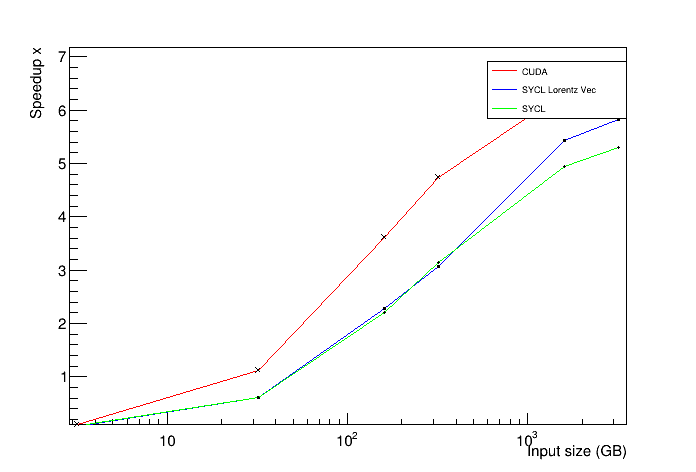

In [87]:
g = ROOT.TGraph(len(sizes), sizes_gb, speedupsycl512)
p = ROOT.TGraph(len(sizes), sizes_gb, speedupcuda512)
q = ROOT.TGraph(len(sizes), sizes_gb, speedupsyclplain512)

#g.AddPoint(sizes, timecpu)

c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
p.SetMarkerStyle(5)
p.SetLineColor(ROOT.kRed)
q.SetMarkerStyle(6)
q.SetLineColor(ROOT.kGreen)



p.SetTitle("")
p.GetXaxis().SetTitle( 'Input size (GB)' )
p.GetYaxis().SetTitle( 'Speedup x' )

p.GetYaxis().SetRangeUser(0,6)

leg = ROOT.TLegend(0.7, 0.75, 0.90, 0.87)
leg.AddEntry(p,"CUDA","L")
leg.AddEntry(g,"SYCL Lorentz Vec","L")
leg.AddEntry(q,"SYCL","l")


c4.SetLogx();

p.Draw()
g.Draw('LP')
q.Draw('LP')
leg.Draw()
c4.Draw()

c4.SaveAs("block"+str(b)+"_embed"+str(embed_computation)+".png")